In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
# 한글출력
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(
    fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

# 그림을 저장할 폴드
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH) :
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# 모든 데이터를 담은 판다스의 데이터프레임 객체를 반환

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info() # 전체 행 수, 각 특성의 데이터 타입과 널이 아닌 값의 개수를 확인하는데 유용

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# total_bedrooms는 207개의 null값 가짐
# ocean_proximity 빼고 모든 특성이 숫자형, 열의 값이 반복되는 것으로 봐서 특성은 아마도 범주형일 듯

In [7]:
housing.describe() # 숫자형 특성의 요약 정보를 보여줌

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


C:\Anaconda3\envs\tf_test\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\tf_test\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


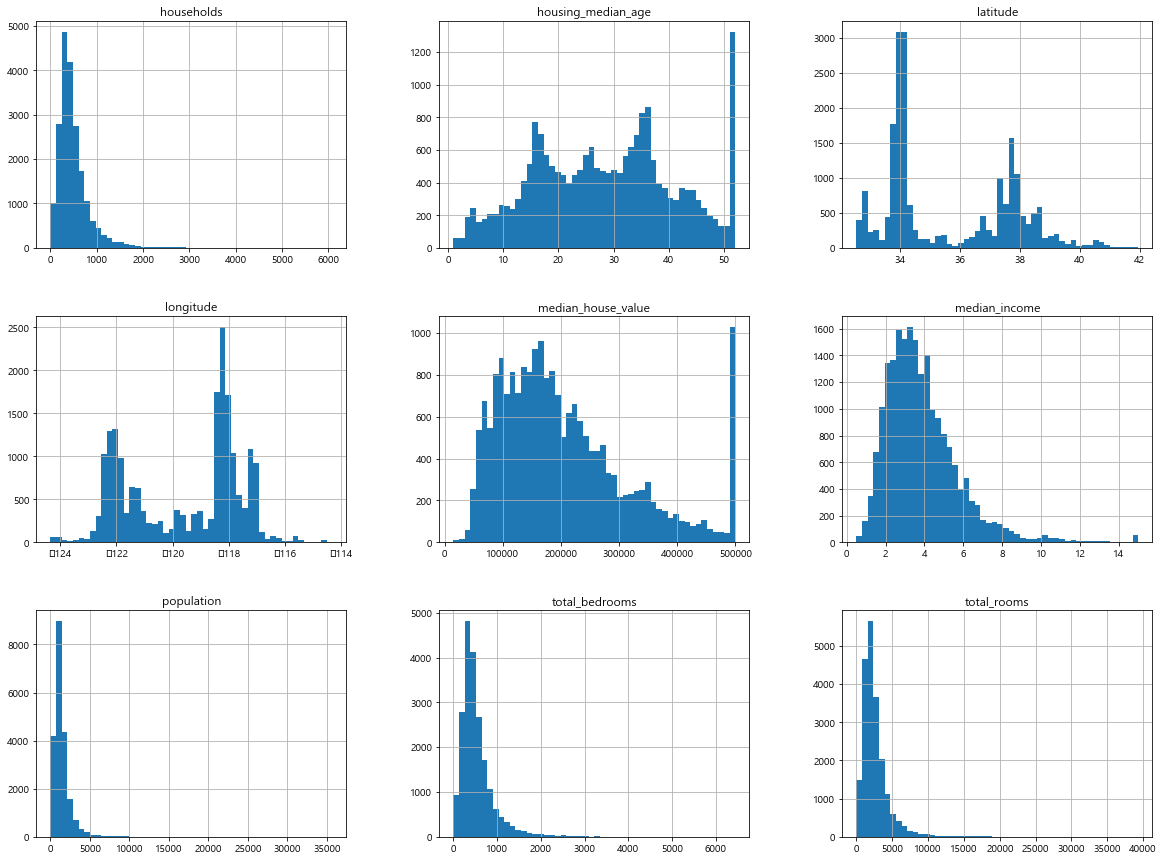

In [8]:
# 데이터 형태를 빠르게 검토하는 방법 : 각 숫자형 특성을 히스토그램으로 그려보는것
%matplotlib inline
import matplotlib.pyplot as plt 
housing.hist(bins=50, figsize=(20,15)) # bin : 데이터가 가지는 x축 영역
plt.show()

1. median income 특성이 US 달러로 표현되어 있지 않다. 
2. housing median age와 median house value는 최댓값과 최솟값을 한정했다.
- median house value는 타깃 속성(레이블)으로 사용되기 때문에 심각한 문제가 될 수 있다.
- 가격이 한곗값을 넘어가지 않도록 머신러닝 알고리즘이 학습될지도 모르기 때문
    - 한계값 밖의 구역에 대한 정확한 레이블을 구한다
    - 훈련 세트에서 이런 구역을 제거한다.
3. 특성들의 스케일이 서로 많이 다르다.
4. 많은 히스토그램의 꼬리가 두껍다.

# 테스트 세트 만들기

# 1. split_train_test

In [9]:
import numpy as np

np.random.seed(42) # 일관된 출력을 위해 유사 난수 초기화

def split_train_test(data, test_ratio) :
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train + ", len(test_set), "test")

16512 train +  4128 test


- 프로그램을 다시 실행하면 다른 테스트 세트가 생성
- 여러 번 계속하면 전체 데이터셋을 보는 것과 같음
- 항상 같은 난수 인덱스가 생성되도록 난수 발생기의 초깃값을 지정
ex) np.random.seed(42)

- 위의 방법은 다음번에 업데이트된 데이터셋을 사용하려면 문제
- 일반적인 해결책은 샘플의 식별자를 사용하여 테스트 세트로 보낼지 말지 정하는 것
- 예를 들어 각 샘플마다 식별자의 해시값을 계산하여 해시의 마지막 바이트의 값이 51(256의 20%정도)보다 작거나 같은 샘플만 
테스트 세트로 보낼수 있다.
- 이렇게 하면 여러번 반복 실행되면서 데이터셋이 갱신되더라도 테스트 세트가 동일하게 유지할 수 있다.
- 새로운 테스트 세트는 새 샘플의 20%를 갖게 되지만 이전에 훈련 세트에 있던 샘플은 포함시키지 않는다.

In [11]:
# 위의 내용 구현
from zlib import crc32

def test_set_check(identifier, test_ratio) :
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column) :
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

# 2. 행의 개수가 같은 여러 개의 데이터셋을 넘겨서 같은 인덱스를 기반으로 나눔

- 주택 데이터셋에는 식별자 컬럼이 없음.
- 행의 인덱스를 ID로 사용하면 간단히 해결

In [12]:
housing_with_id = housing.reset_index() # 'index' 열이 추가된 데이터프레임이 반환
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [13]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [14]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [15]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [16]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)

In [17]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


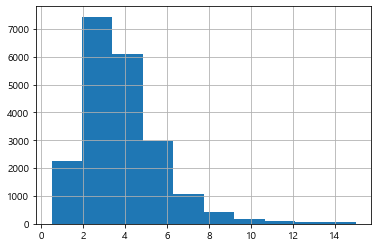

In [18]:
housing["median_income"].hist()

In [19]:
# 소득의 카테고리 수 제한
housing["income_cat"] = np.ceil(housing["median_income"]/1.5) # ceil : 올림
housing["income_cat"].where(housing["income_cat"]<5, 5.0, inplace=True) # 5보다 큰 카테고리는 5로 합침

In [20]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

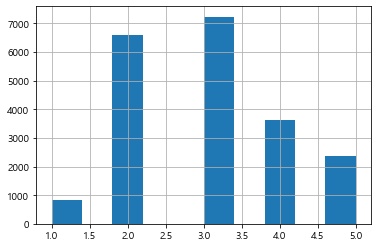

In [21]:
housing["income_cat"].hist()
#save_fig('C:/Users/김성현/Desktop/빅데이터/python-RE-/핸즈온/datasets/income_category_hist')

# 소득 카테고리를 기반으로 계층 샘플링

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]) :
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [23]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [24]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [25]:
def income_cat_proportions(data) :
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)

compare_props = pd.DataFrame({
    "전체" : income_cat_proportions(housing),
    "무작위 샘플링" : income_cat_proportions(test_set), 
    "계층 샘플링" : income_cat_proportions(strat_test_set),
}).sort_index()
compare_props["무작위 샘플링 오류율"] = 100 * compare_props["무작위 샘플링"] / compare_props["전체"] - 100
compare_props["계층 샘플링 오류율"] = 100 * compare_props["계층 샘플링"] / compare_props["전체"] - 100

In [26]:
compare_props

,전체,무작위 샘플링,계층 샘플링,무작위 샘플링 오류율,계층 샘플링 오류율
1.0,0.039826,0.040213,0.039729,0.973236,-0.243309
2.0,0.318847,0.324370,0.318798,1.732260,-0.015195
3.0,0.350581,0.358527,0.350533,2.266446,-0.013820
4.0,0.176308,0.167393,0.176357,-5.056334,0.027480
5.0,0.114438,0.109496,0.114583,-4.318374,0.127011


In [27]:
# income_cat 특성을 삭제해서 데이터를 원래 상태로
for set_ in (strat_train_set, strat_test_set) :
    set_.drop("income_cat", axis=1, inplace=True)

# 데이터 이해를 위한 탐색과 시각화

- 예제에서는 크기가 작으므로 훈련 세트 전체를 사용
- 훈련 세트를 손상시키지 않기 위해 복사본 사용

In [28]:
housing = strat_train_set.copy()

[Text(0, 0.5, '위도'), Text(0.5, 0, '경도')]

C:\Anaconda3\envs\tf_test\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\tf_test\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


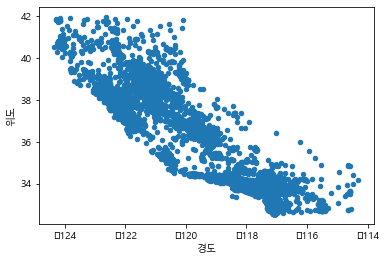

In [29]:
ax = housing.plot(kind = "scatter", x="longitude", y="latitude")
ax.set(xlabel="경도", ylabel="위도")
#save_fig("C:/Users/김성현/Desktop/빅데이터/python-RE-/핸즈온/datasets/bad_visualization_plot")

[Text(0, 0.5, '위도'), Text(0.5, 0, '경도')]

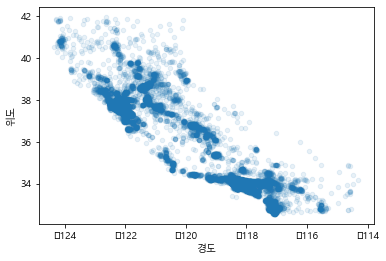

In [30]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
ax.set(xlabel='경도', ylabel='위도')
#save_fig("C:/Users/김성현/Desktop/빅데이터/python-RE-/핸즈온/datasets/better_visualization_plot2")

sharex=False 매개변수는 x-축의 값과 범례를 표시하지 못하는 버그를 수정합니다. 이는 임시 방편입니다

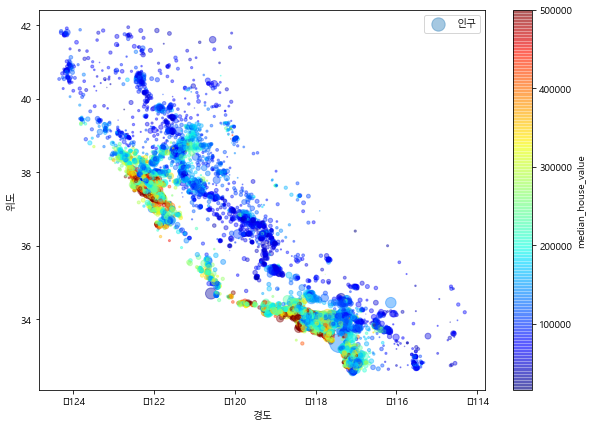

In [31]:
ax = housing.plot(kind = "scatter", x="longitude", y = "latitude", alpha=0.4,
                 s=housing["population"]/100, label="인구", figsize=(10,7),
                 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
                  sharex=False)
ax.set(xlabel="경도", ylabel="위도")
plt.legend()
#save_fig("C:/Users/김성현/Desktop/빅데이터/python-RE-/핸즈온/datasets/housing_prices_scatterplot")

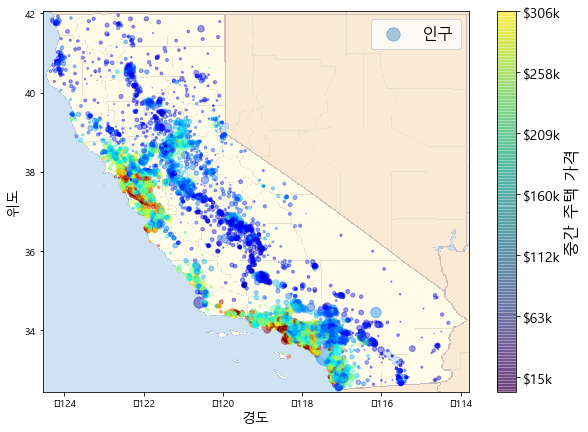

In [32]:
import matplotlib.image as mpimg
california_img=mpimg.imread(PROJECT_ROOT_DIR + '/datasets/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="인구",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("위도", fontsize=14)
plt.xlabel("경도", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('중간 주택 가격', fontsize=16)

plt.legend(fontsize=16)
#save_fig("C:/Users/김성현/Desktop/빅데이터/python-RE-/핸즈온/datasets/california_housing_prices_plot")
plt.show()

# 상관계수
- 선형적인 상관관계만 측정

In [33]:
corr_matrix = housing.corr()

In [34]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

# 숫자형 특성 사이에 산점도를 그려서 상관관계 확인

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025CC32D0908>,
      dtype=object)

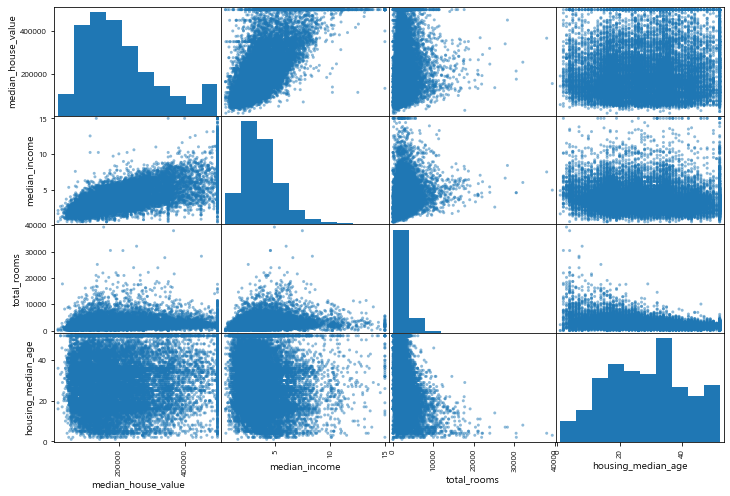

In [35]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
# save_fig("C:/Users/김성현/Desktop/빅데이터/python-RE-/핸즈온/datasets/scatter_matrix_plot")

[0, 16, 0, 550000]

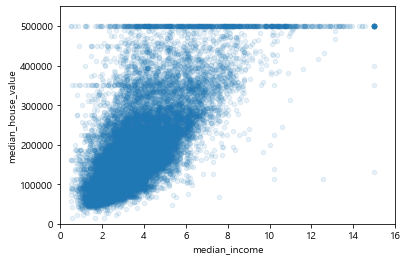

In [36]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])
# save_fig("C:/Users/김성현/Desktop/빅데이터/python-RE-/핸즈온/datasets/income_vs_house_value_scatterplot")

- 상관관계가 매우 강하다.(위쪽으로 향하는 경향이 있음, 포인트들이 너무 멀리 퍼져 있지 않다.)
- 가격 제한 값이 $500,000에서 수평선으로 잘보이지만 450,000, 350,000, 280,000 근처에도 수평선이 보인다.(해당 구역 제거 필요)

In [37]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [38]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

bedrooms_per_room 특성은 total_rooms, total_bedrooms보다 median_house_value와의 상관관계가 높다.

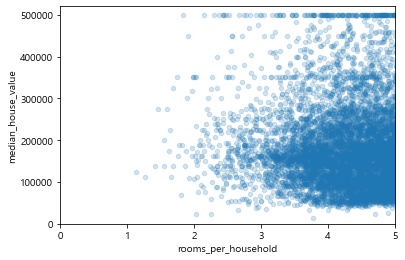

In [39]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [40]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# 머신 러닝 알고리즘을 위한 데이터 준비
# <함수를 만들어 자동화 하는 이유>
- 어떤 데이터셋에 대해서도 데이터 변환을 손쉽게 반복할 수 있다.
- 향후 프로젝트에 사용할 수 있는 변환 라이브러리를 점진적으로 구축
- 실제 시스템에서 알고리즘에 새 데이터를 주입하기 전에 변환시키는 데 이 함수를 사용할 수 있다.
- 여러 가지 데이터 변환을 쉽게 시도해볼 수 있고 어떤 조합이 가장 좋은지 확인하는 데 편리

- 원래 훈련 세트 복원 (strat_train_set을 다시 한번 복사)
- 예측 변수와 타깃 값에 같은 변형을 적용하지 않기 위해 예측 변수와 레이블을 분리(drop()은 데이터 복사본을 만들며 strat_train_set에는 영향을 주지 않는다,)

In [41]:
print(strat_train_set.columns)
print(len(strat_train_set.columns))

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
10


In [42]:
housing = strat_train_set.drop("median_house_value", axis=1) # 훈련 세트를 위해 레이블 삭제
print(housing.columns)
print(len(housing.columns))
housing_labels = strat_train_set["median_house_value"].copy()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')
9


# 데이터 정제
total_bedrooms의 207개의 na 수정
   - 해당 구역 제거, 전체 특성 삭제, 어떤 값으로 채움(0, 평균, 중간값)

In [43]:
sample_incomplete_rows=housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [44]:
# 옵션 1
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [45]:
# 옵션2
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [46]:
# 옵션 3
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace = True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


중간값을 저장해야 한다. 나중에 시스템을 평가할 때 테스트 세트에 있는 누락된 값을 바꾸기 위해 필요하고 시스템이 실제 운영될 때 새로운 데이터에서 누락된 값을 바꿔야 하기 때문

In [47]:
# Imputer는 누락된 값을 손쉽게 다룸
# from sklearn.processing.import Imputer  # 버전에 안맞음
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

중간값이 수치형 특성에서만 계산될 수 있기 때문에 텍스트 특성을 삭제

In [48]:
housing_num = housing.drop('ocean_proximity', axis = 1)
# 다른 방법 : housing_num = housing.select_dtypes(includ=[np.number])

In [49]:
imputer.fit(housing_num)
# imputer는 각 특성의 중간값을 계산해서 그 결과를 객체의 statistics_속성에 저장

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

새로운 데이터에서 어떤 값이 누락될지 확신할 수 없으므로 모든 수치형 특성에 imputer를 적용하는 것이 바람직하다.

In [50]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [51]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

훈련 세트 변환

In [52]:
X = imputer.transform(housing_num) 
# 훈련세트에서 누락된 값을 학습한 중간값으로 변환

In [53]:
print(X.shape) # 넘파이 배열

(16512, 8)


In [54]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = list(housing.index.values))
#  넘파이 배열을 다시 데이터프레임으로 간단히 되돌리기

# NO 이해
# help me

In [55]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [56]:
imputer.strategy 

'median'

In [57]:
housing_tr=pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


### 범주형 특성인 'ocean_proximity' 을 전처리

### 1.

In [58]:
housing_cat = housing["ocean_proximity"]
housing_cat.head(5)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
Name: ocean_proximity, dtype: object

판다스의 factorize()메소드는 문자열 범주형 특성을 머신러닝 알고리즘이 다루기 쉬운 숫자 범주형 특성으로 변환시켜줌

In [59]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0], dtype=int64)

In [60]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

one-hot encoding

In [61]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories='auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1)) 
# fit_transform()은 2차원 배열을 넣어줘야함 housing_cat_encoded는 1차원이므로 구조를 바꿔야함
# reshape() -1은 차원을 지정하지 않는다는 뜻
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

OneHotEncoder는 기본적으로 희소 행렬을 반환, 필요시 밀집 배열로 변환

In [62]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [63]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

CategoricalEncoder는 하나 이상의 특성을 가진 2D배열을 기대한다. 따라서 housing_cat을 2D배열로 바꾸어 줘야 한다.

In [64]:
#from sklearn.preprocessing import CategoricalEncoder
cat_encoder = CategoricalEncoder()
housing_cat_reshaped = housing_cat.values.reshape(-1,1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

사이킷런 0.20 개발 브랜치에 있던 `CategoricalEncoder`는 새로운 `OneHotEncoder`와 `OrdinalEncoder`로 나뉘었습니다. `OneHotEncoder`로 문자열로 된 범주형 변수도 변환할 수 있습니다:

In [65]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(categories='auto')
housing_cat_reshaped = housing_cat.values.reshape(-1,1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

기본 인코딩은 원-핫 벡터이고 희소 행렬로 반환. 'toarray()' 메소드를 사용하여 밀집 배열로 바꿀 수 있다:

In [66]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

또는 encoding 매개변수를  'one-hot-dense'  로 지정하여 희소 행렬대신 밀집 행렬을 얻을 수 있다. sparse=False 옵션을 주어 밀집 행렬을 얻는다

In [67]:
cat_encoder = OneHotEncoder(categories='auto', sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [68]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 추가 특성을 위해 나만의 변환기를 만들기

In [69]:
from sklearn.base import BaseEstimator, TransformerMixin

# 컬럼 인덱스
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin) :
    def __init__(self, add_bedrooms_per_room = True) : # no *args or **kargs
        # 변환기가 add_bedrooms_per_room 하이퍼파라미터를 하나를 가지고 있고 기본값을 True로 지정
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None) :
        return self  # nothing else to do
    
    def transform(self, X, y=None) :
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room :
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [70]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs, 
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


모든 특성의 범위를 같도록 만들어주는 방법
- min-max 스케일링(정규화) : 0~1 범위에 들도록 값을 이동하고 스케일을 조정, 데이터에서 최솟값을 뺀 후 최댓값과 최솟값의 차이로 나눈다. 변환기는 MinMaxScaler
- 표준화 : 먼저 평균을 뺀 후 표준편차로 나누어 결과 분포의 분산이 1이 되도록 한다. 범위의 상한과 하한이 없어 어떤 알고리즘에서는 문제가 될 수 있다. 이상치에 영향을 덜 받는다. 변환기는 StandardScaler

### 수치 특성을 전처리하기 위한 파이프라인을 만듬
- 마지막 단계에는 변환기와 추정기를 모두 사용할 수 있고 그 외에는 모두 변환기여야 한다.

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_addr', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [72]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

### 판다스 DataFrame 컬럼의 일부를 선택하는 변환기 만들기

In [73]:
from sklearn.base import BaseEstimator, TransformerMixin

# 사이킷런이 DataFrame을 바로 사용하지 못하므로 수치형이나 범주형 컬럼을 선택하는 클래스를 만든다.
class DataFrameSelector(BaseEstimator, TransformerMixin) :
    def __init__(self, attribute_names) :
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None) :
        return self
    
    def transform(self, X) :
        return X[self.attribute_names].values

하나의 큰 파이프라인에 이들을 모두 결합하여 수치형과 범주형 특성을 전처리

In [74]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
num_pipeline=Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

두 파이프라인을 하나의 파이프라인으로 합치기

In [75]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [76]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [77]:
housing_prepared.shape

(16512, 16)

# 모델 선택과 훈련

## 훈련 세트에서 훈련하고 평가하기

In [78]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
# 훈련 샘플 몇 개를 사용해 전체 파이프라인을 적용해보기
some_data = housing.iloc[:5]
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [80]:
some_labels = housing_labels.iloc[:5]
print(some_labels) # median_house_value

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64


In [81]:
some_data_prepared = full_pipeline.transform(some_data)
print("예측 :", list(lin_reg.predict(some_data_prepared)))
print("레이블 : ", list(some_labels))

예측 : [210644.60459285573, 317768.8069721082, 210956.43331178243, 59218.98886849082, 189747.55849878513]
레이블 :  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [82]:
# RSME 측정
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

대부분 구역의 중간 주택 가격은 $120,000에서 $265,000사이이다. 예측 오차가 $68,628인 것은 매우 만족스럽지 못하다.
이는 모델이 훈련 데이터에 과소적합된 사례이다. 더 강력한 모델을 선택하거나 훈련 알고리즘에 더 좋은 특성을 주입하거나 모델의 규제를 감소시킨다.

In [83]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49439.89599001897

# DecisionTreeRegressor : 강력하고 데이터에서 복잡한 비선형 관계를 찾을 수 있다

In [84]:
# 훈련
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [85]:
# 훈련 세트로 평가
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

너무 심하게 과대적합 되었다.

# 모델 세부 튜닝
- 교차 검증을 사용한 평가

In [86]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

#### cross_val_score의 score 매개변수는 클수록 좋은 성능을 나타냄. 따라서 scoring 매개변수에 mean square error의 반대값(음수값)을 계산하는 neg_mean_squared_error를 사용함.

In [87]:
def display_scores(scores) :
    print("점수 : ", scores)
    print("평균 : ", scores.mean())
    print("표준편차 : ", scores.std())
    
display_scores(tree_rmse_scores)

점수 :  [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
평균 :  71407.68766037929
표준편차 :  2439.4345041191004


In [88]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수 :  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
평균 :  69052.46136345083
표준편차 :  2731.67400179835


결정트리모델 : 71407 +- 2439 / 선형 회귀 : 69052 +- 2731
    => 결정 트리 모델이 과대적합 되어 선형회귀보다 성능이 나쁘다

### RandomFroest : 특성을 무작위로 선택해서 많은 결정 트리를 만들고 그 예측을 평균 내는 방식으로 작동
### 앙상블 학습 : 여러 다른 모델을 모아서 하나의 모델을 만드는 것, 머신러닝 알고리즘의 성능을 극대화하는 방법

In [89]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [90]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21933.31414779769

In [91]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수 :  [51646.44545909 48940.60114882 53050.86323649 54408.98730149
 50922.14870785 56482.50703987 51864.52025526 49760.85037653
 55434.21627933 53326.10093303]
평균 :  52583.72407377466
표준편차 :  2298.353351147122


전의 모델보다 훌륭하지만 여전히 훈련 세트에 대한 점수가 검증 세트에 대한 점수보다 훨씬 낮으므로 이 모델도 여전히 훈련 세트에 과대적합되어 있다.

In [92]:
# 모델 저장
my_model = forest_reg
from sklearn.externals import joblib
joblib.dump(my_model, "my_model.pkl")
# my_model_loaded=joblib.load("my_model.pkl")

C:\Anaconda3\envs\tf_test\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['my_model.pkl']

# 세부 튜닝
### 1. 그리드 탐색
- 탐색하고자 하는 하이퍼파라미터와 시도해볼 값을 지정만 하면 된다. 그러면 가능한 모든 하이퍼파라미터 조합에 대해 교차 검증을 사용해 평가하게 된다.
- 비교적 적은 수의 조합을 탐구할 때 괜춘

- RandomForestRegressor에 대한 최적의 하이퍼파라미터 조합 탐색

In [93]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 하이퍼파라미터 12(=3×4)개의 조합을 시도합니다.
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도합니다.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# 다섯 폴드에서 훈련하면 총 (12+6)*5=90번의 훈련이 일어납니다.
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True, n_jobs=-1)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

#### 최적의 조합

In [94]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

##### ※ 8과 30은 탐색 범위의 최댓값이기 때문에 계속 점수가 향상될 가능성이 있으므로 더 큰 값으로 다시 검색해야 한다.

#### 최적의 추정기

In [95]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

#### GridSerchCV에서 테스트한 하이퍼파라미터 조합의 점수를 확인한다.

In [96]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

RMSE점수가 49682로 위의 52583보다 조금 더 좋다.

## 2. 랜덤 탐색
- 탐색 공간이 커지면 사용하는 편이 좋음
- 그리드탐색과 거의 같은 방식으로 사용하지만 가능한 모든 조합을 시도하는 대신 각 반복마다 하이퍼파라미터에 임의의 수를 대입하여 지정한 횟수만큼 평가
- 1000회 반복하도록 실행하면 하이퍼파라미터마다 각기 다른 1000개의 값을 탐색
- 단순히 반복 횟수를 조절하는 것만으로 하이퍼파라미터 탐색에 투입할 컴퓨팅 자원을 제어할 수 있음

In [97]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', 
                                random_state=42, n_jobs=-1)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [98]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [99]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51389.889203389284 {'max_features': 5, 'n_estimators': 15}
50796.155224308866 {'max_features': 3, 'n_estimators': 72}
50835.13360315349 {'max_features': 5, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
50774.90662363929 {'max_features': 3, 'n_estimators': 75}
50682.78888164288 {'max_features': 3, 'n_estimators': 88}
49608.99608105296 {'max_features': 5, 'n_estimators': 100}
50473.61930350219 {'max_features': 3, 'n_estimators': 150}
64429.84143294435 {'max_features': 5, 'n_estimators': 2}


## 3. 앙상블 방법 : 최상의 모델을 연결하는 것

### 최상의 모델과 오차 분석

In [100]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [101]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
#cat_encoder = full_pipeline.named_transformers_["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872965, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.002856474637320158, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

# 테스트 세트로 시스템 평가하기

In [102]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47730.22690385927

#### 테스트 RMSE에 대한 95% 신뢰구간 계산

In [103]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([45685.10470776, 49691.25001878])

# 연습문제
- 이 장에서 소개한 주택 가격 데이터셋을 사용해 문제를 푸세요.

#### 1. 서포트 벡터 머신 회귀(sklearn.svm.SVR)를 kernel="linear"(하이퍼파라미터 C를 바꿔가며)나 kernel="rbf"(하이퍼파라미터 C와 gamma를 바꿔가며)등의 다양한 하이퍼파라미터 설정으로 시도해보세요. 지금은 이 하이퍼파라미터가 무엇을 의미하는지는 너무 신경쓰지 마세요. 최상의 SVR모델은 무엇인가요?

In [104]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVR

# param_grid = [
#     {'kernel' : ['linear'], 'C' : [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
#      {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
#       'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
# ]

# svm_reg = SVR()
# grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', 
#                            verbose=2, n_jobs=1)
# grid_search.fit(housing_prepared, housing_labels)

최상 모델의 (5-폴드 교차 검증으로 평가한)점수

In [105]:
# negative_mse = grid_search.best_score_
# rmse = np.sqrt(-negative_mse)
# rmse

In [106]:
# grid_search.best_params_

선형 커널이 RBF 커널보다 성능이 낫다. C는 테스트 한 것 중에 최댓값이 선택되었다. 따라서 작은 값들은 지우고 더 큰 값의 C로 그리드서치를 다시 실행해 보아야 한다. 아마도 더 큰 값의 C에서 성능이 높아질 것이다.

#### 2. GridSearchCV를 RandomizedSearchCV로 바꾸세요